In [2]:
import pandas as pd

In [33]:
#load demographics (which we will merge in to each vol table later
df_demog = (pd.read_table('resources/subjects_HCA.csv',sep=',')
            .assign(age = lambda df_: df_.interview_age/12.0)
            .assign(subject = lambda df_: 'sub-' + df_.subject.astype(str))            
           )

      
methods = ['freesurfer','ashs','hippunfold-t2-freesurferatlas','hippunfold-t2-magdeburgatlas']
methods_abbr = ['FS','ASHS','HippUnfold-T2-FS','HippUnfold-T2-ASHS']
id_cols = ['subject','hemi','age','sex']
subfields = ['CA1','CA3','CA4_DG','Sub']
comparison = ['FS','ASHS','FS','ASHS']

    
df = pd.concat( [(pd.
            read_table(f'results/{method}_volumes.tsv') #read table
            .merge(df_demog,on='subject')  # merge in demographics
            .melt(id_vars=id_cols,value_vars=subfields,var_name='subfield',value_name='volume')  #convert from wide to tidy
            .assign(method = lambda df_:method)  #add a column for the method
           )
            for method,abbr in zip(methods,abbr) ]   #concatenate all the tidy tables 
         )

    
    
df.sample(10)
    
    

,subject,hemi,age,sex,subfield,volume,method
719,sub-7137567,R,45.916667,M,Sub,555.575664,freesurfer
651,sub-8502872,R,81.083333,F,Sub,1062.623004,ashs
680,sub-7670989,L,41.583333,F,Sub,470.504324,freesurfer
171,sub-6631671,R,68.166667,F,CA1,538.387299,hippunfold-t2-freesurferatlas
228,sub-8858912,L,42.833333,M,CA3,90.332049,ashs
673,sub-7243263,R,55.916667,F,Sub,1181.335218,ashs
774,sub-9688312,L,60.916667,F,Sub,263.414434,hippunfold-t2-freesurferatlas
383,sub-8127165,R,57.333333,M,CA3,140.686035,ashs
725,sub-8854398,R,42.750000,F,Sub,475.635203,hippunfold-t2-freesurferatlas
183,sub-6771081,R,65.833333,F,CA1,615.567199,hippunfold-t2-magdeburgatlas


In [15]:
df_fs = pd.read_table('results/freesurfer_volumes.tsv')
df_hippunfold_fs = pd.read_table('results/hippunfold-freesurferatlas_volumes.tsv')
df_hippunfold_bigbrain = pd.read_table('results/hippunfold-bigbrainatlas_volumes.tsv')
df_ashs = pd.read_table('results/ashs_volumes.tsv')
df_hippunfold_ashs = pd.read_table('results/hippunfold-magdeburgatlas_volumes.tsv')


#add CA4 and DG in the bigbrain label (since these are not separated in FS or ASHS):
df_hippunfold_bigbrain['CA4_DG'] = df_hippunfold_bigbrain.CA4 + df_hippunfold_bigbrain.DG

df_fs = pd.merge(df_demog,df_fs,on='subject')
df_ashs = pd.merge(df_demog,df_ashs,on='subject')
df_hippunfold_fs = pd.merge(df_demog,df_hippunfold_fs,on='subject')
df_hippunfold_ashs = pd.merge(df_demog,df_hippunfold_ashs,on='subject')
df_hippunfold_bigbrain = pd.merge(df_demog,df_hippunfold_bigbrain,on='subject')

<AxesSubplot:xlabel='Sub', ylabel='Sub'>

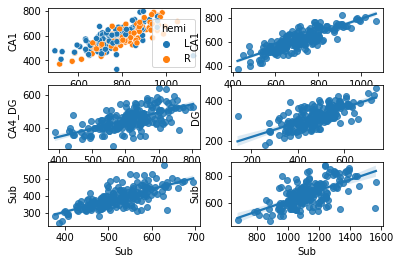

In [3]:

#scatterplot hippunfold vs other method

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2,nrows=3)

sns.scatterplot(x=df_fs.CA1,y=df_hippunfold_fs.CA1,ax=axs[0][0],hue=df_hippunfold_fs.hemi)
sns.regplot(x=df_ashs.CA1,y=df_hippunfold_ashs.CA1,ax=axs[0][1])

sns.regplot(x=df_fs.CA4_DG,y=df_hippunfold_fs.CA4_DG,ax=axs[1][0])
sns.regplot(x=df_ashs.DG,y=df_hippunfold_ashs.DG,ax=axs[1][1])

sns.regplot(x=df_fs.Sub,y=df_hippunfold_fs.Sub,ax=axs[2][0])
sns.regplot(x=df_ashs.Sub,y=df_hippunfold_ashs.Sub,ax=axs[2][1])


<AxesSubplot:xlabel='interview_age', ylabel='Sub'>

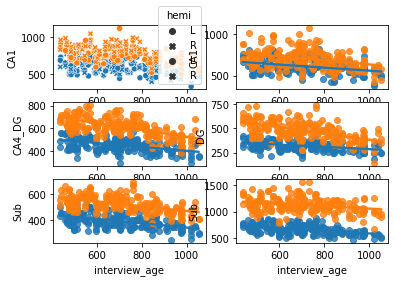

In [4]:
#scatterplot age vs vol for each method
fig, axs = plt.subplots(ncols=2,nrows=3)

sns.scatterplot(x=df_fs.interview_age,y=df_hippunfold_fs.CA1,ax=axs[0][0],style=df_fs.hemi)
sns.scatterplot(x=df_fs.interview_age,y=df_fs.CA1,ax=axs[0][0],style=df_fs.hemi)



sns.regplot(x=df_fs.interview_age,y=df_hippunfold_ashs.CA1,ax=axs[0][1])
sns.regplot(x=df_fs.interview_age,y=df_ashs.CA1,ax=axs[0][1])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_fs.CA4_DG,ax=axs[1][0])
sns.regplot(x=df_fs.interview_age,y=df_fs.CA4_DG,ax=axs[1][0])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_ashs.DG,ax=axs[1][1])
sns.regplot(x=df_fs.interview_age,y=df_ashs.DG,ax=axs[1][1])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_fs.Sub,ax=axs[2][0])
sns.regplot(x=df_fs.interview_age,y=df_fs.Sub,ax=axs[2][0])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_ashs.Sub,ax=axs[2][1])
sns.regplot(x=df_fs.interview_age,y=df_ashs.Sub,ax=axs[2][1])


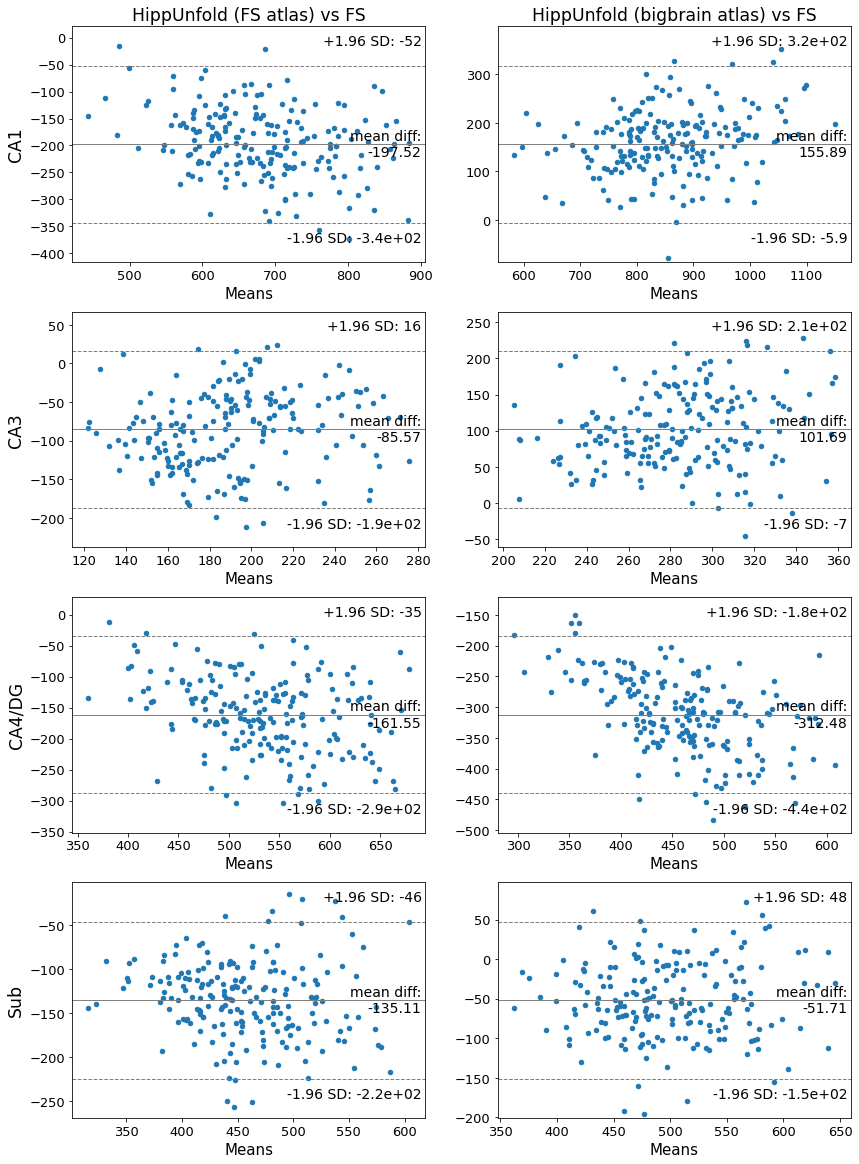

In [5]:
import statsmodels.api as sm

f, axs = plt.subplots(ncols=2,nrows=4, figsize=(12,16))
#f.tight_layout(pad=3)

sm.graphics.mean_diff_plot(df_hippunfold_fs.CA1,df_fs.CA1,ax=axs[0][0])
sm.graphics.mean_diff_plot(df_hippunfold_fs.CA3,df_fs.CA3,ax=axs[1][0])
sm.graphics.mean_diff_plot(df_hippunfold_fs.CA4_DG,df_fs.CA4_DG,ax=axs[2][0])
sm.graphics.mean_diff_plot(df_hippunfold_fs.Sub,df_fs.Sub,ax=axs[3][0])

sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA1,df_fs.CA1,ax=axs[0][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA3,df_fs.CA3,ax=axs[1][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA4_DG,df_fs.CA4_DG,ax=axs[2][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.Sub,df_fs.Sub,ax=axs[3][1])

rows = ['CA1','CA3','CA4/DG','Sub']
cols = ['HippUnfold (FS atlas) vs FS','HippUnfold (bigbrain atlas) vs FS']

for ax, col in zip(axs[0], cols):
    ax.set_title(col,size='xx-large')

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='xx-large')

for ax in axs[:,1]:
    ax.set_ylabel('')

plt.show()

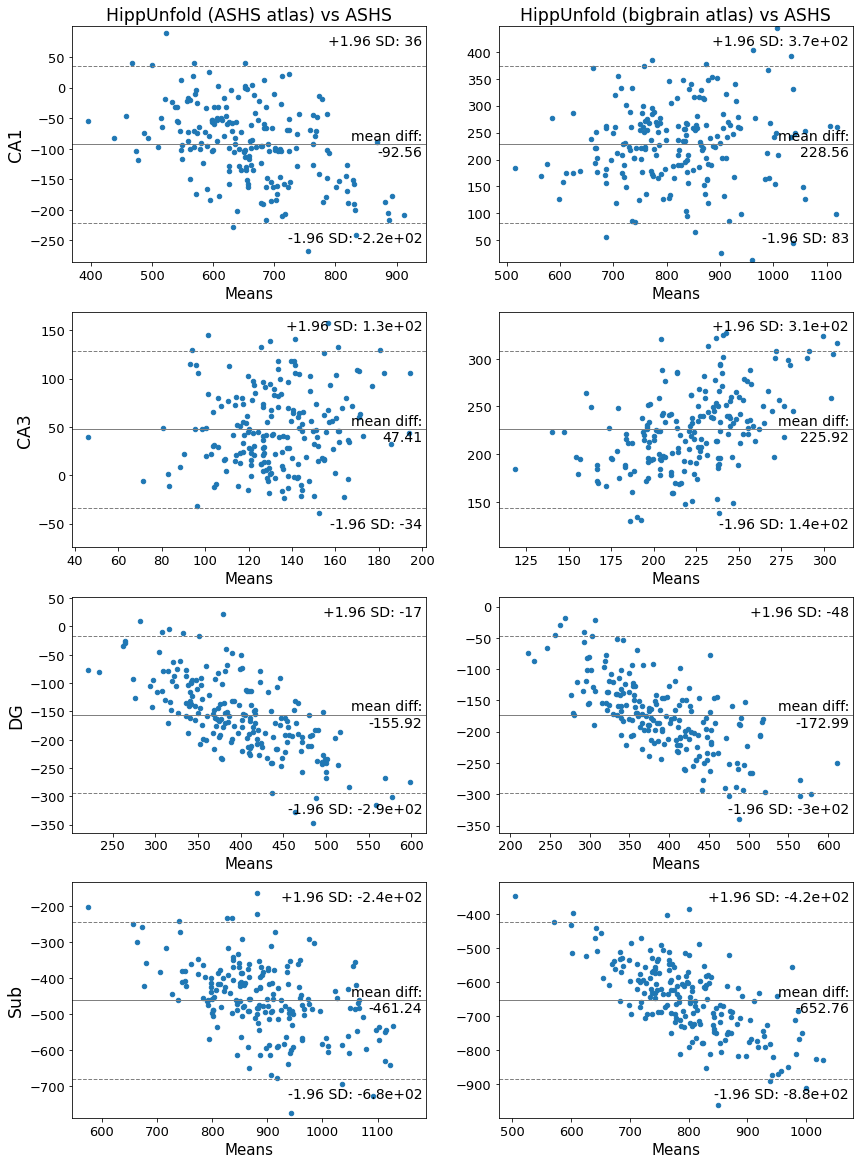

In [6]:
import statsmodels.api as sm

f, axs = plt.subplots(ncols=2,nrows=4, figsize=(12,16))

sm.graphics.mean_diff_plot(df_hippunfold_ashs.CA1,df_ashs.CA1,ax=axs[0][0])
sm.graphics.mean_diff_plot(df_hippunfold_ashs.CA3,df_ashs.CA3,ax=axs[1][0])
sm.graphics.mean_diff_plot(df_hippunfold_ashs.DG,df_ashs.DG,ax=axs[2][0])
sm.graphics.mean_diff_plot(df_hippunfold_ashs.Sub,df_ashs.Sub,ax=axs[3][0])


sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA1,df_ashs.CA1,ax=axs[0][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA3,df_ashs.CA3,ax=axs[1][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA4_DG,df_ashs.DG,ax=axs[2][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.Sub,df_ashs.Sub,ax=axs[3][1])

rows = ['CA1','CA3','DG','Sub']
cols = ['HippUnfold (ASHS atlas) vs ASHS','HippUnfold (bigbrain atlas) vs ASHS']

for ax, col in zip(axs[0], cols):
    ax.set_title(col,size='xx-large')

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='xx-large')

for ax in axs[:,1]:
    ax.set_ylabel('')

plt.show()